In [2]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import os

from sympy.printing.pretty.pretty_symbology import line_width

In [3]:
DATA_DIR = '/Users/aplle/Code/MathModeling/SC/dataset'
OUT_DIR = '/Users/aplle/Code/MathModeling/SC/plots'
RESULT_DIR = '/Users/aplle/Code/MathModeling/SC/results'

os.makedirs(OUT_DIR, exist_ok=True)

In [4]:
train_df = pd.read_csv(f"{DATA_DIR}/train.csv")
eval_df = pd.read_csv(f"{DATA_DIR}/eval.csv")
test_df = pd.read_csv(f"{DATA_DIR}/test.csv")

df = pd.concat([train_df, eval_df, test_df], axis=0, join='outer')

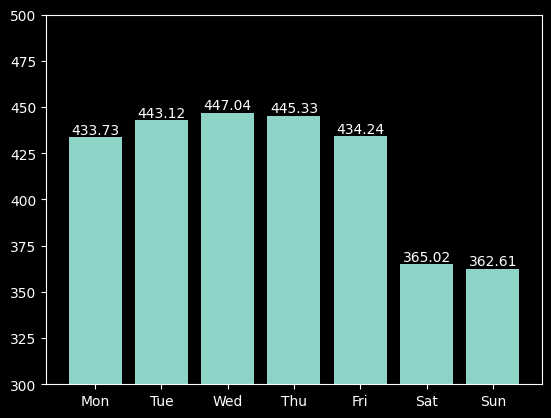

In [26]:
daily = df.groupby(['Weekday', 'Region'])['Power (kW)'].agg(['mean', 'sum'])
plt.ylim(300,500)
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], daily['mean'].tolist())
for x,y in enumerate(daily['mean'].tolist()):
    plt.text(x, y + 0.05, '%.2f' % y, ha='center', va='bottom')
plt.show()

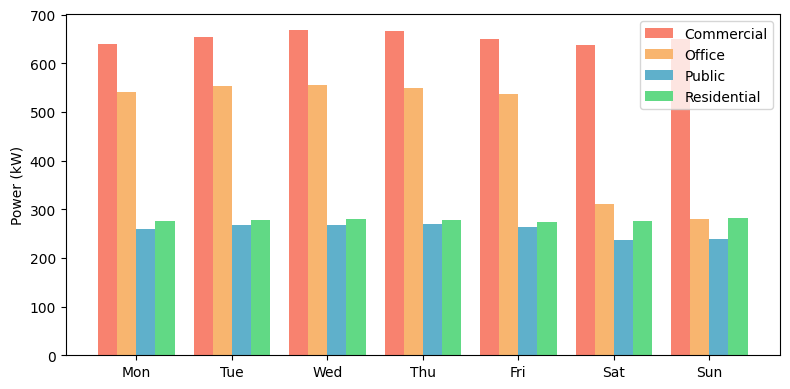

In [101]:
table = df.groupby(['Region', 'Weekday'])['Power (kW)'].agg(['mean']).unstack('Region')

days = table.index
regions = table.columns

x = np.arange(len(days))
width = 0.8 / len(regions)

plt.figure(figsize=(8, 4))

palette1 = ['#B86129', '#92C69F', '#F4B47A', '#89A8EC']
palette2 = ['#91C1F1', '#92C69F', '#E7CAA2', '#64CEE4']
palette3 = ['#FF5A40', '#FFA240', '#3AAACF', '#37DE6A']
palette4 = ['#F8826F', '#F8B56F', '#5FB0CB', '#61D985']

for i, p in enumerate(regions):
    plt.bar(
        x + i * width,
        table[p].values,
        width,
        label=p[1],
        color=palette4[i]
    )

plt.xticks(x + width * (len(regions) - 1) / 2, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Power (kW)')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, 'Weekday-plot.png'), dpi=300)
plt.show()


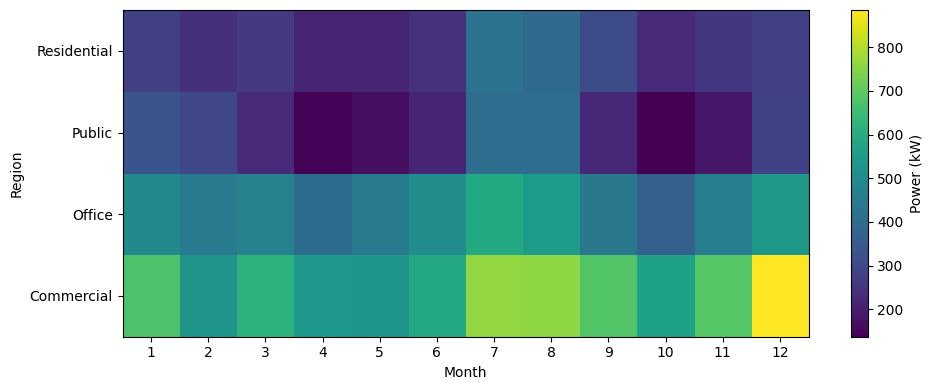

In [95]:
table = df.groupby(['Region', 'Month'])['Power (kW)'].agg(['mean']).unstack('Month')

plt.figure(figsize=(10, 4))

im = plt.imshow(
    table.values,
    aspect='auto',
    origin='lower'
)

plt.colorbar(im, label='Power (kW)')

plt.xticks(
    ticks=range(12),
    labels=[f'{m}' for m in range(1, 13)]
)

plt.yticks(
    ticks=range(len(table.index)),
    labels=table.index
)

plt.xlabel('Month')
plt.ylabel('Region')

plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, 'Month-plot.png'), dpi=300)
plt.show()

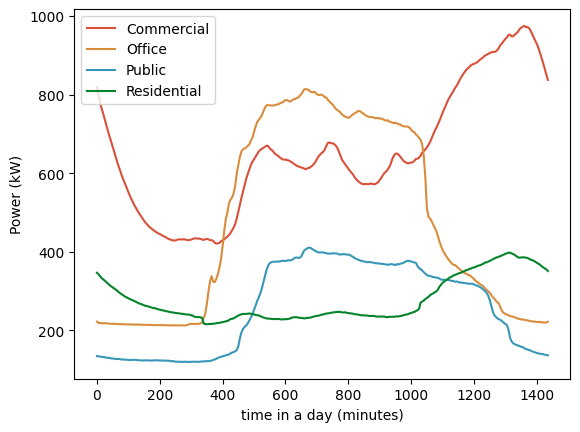

In [107]:
palette5 = ['#D9503B', '#D98C3B', '#3797B7', '#04842A']

table = df.groupby(['Region', 'Time'])['Power (kW)'].agg(['mean']).unstack('Region')

regions = table.columns
for i, region in enumerate(regions):
    plt.plot(range(0, len(table.index)*5, 5), table[region], label=region[1], color=palette5[i])

plt.xlabel('time in a day (minutes)')
plt.ylabel('Power (kW)')
plt.legend()
plt.savefig(os.path.join(OUT_DIR, 'time-plot.png'), dpi=300)

In [36]:
power = df['Power (kW)']
power = power.dropna()
power_clipped = power[power >= 100]
power_clipped = power_clipped[power_clipped <= 1000]
# power = power_clipped

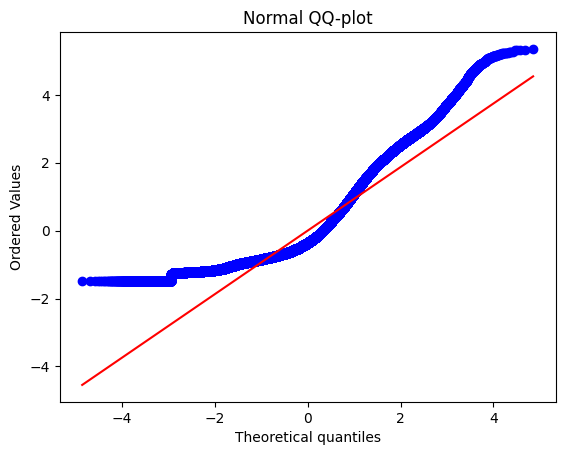

In [37]:
stats.probplot((power.to_numpy() - power.mean())/power.std(), dist="norm", plot=plt)
plt.title("Normal QQ-plot")
plt.show()

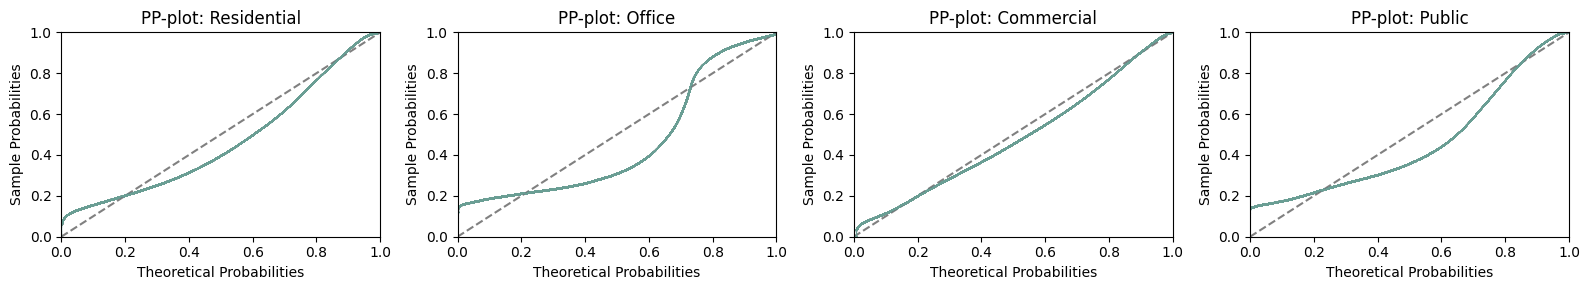

In [86]:
regions = df['Region'].unique()
fig, axes = plt.subplots(1, 4, figsize=(4 * 4, 3 * 1))
axes = axes.flatten()

for i, region in enumerate(regions):
    ax = axes[i]
    power_region = df[df['Region'] == region]['Power (kW)']
    power_region = power_region.dropna()
    ax.plot([0,1],[0,1], linestyle='--', color='grey')
    z = (power_region.to_numpy() - power_region.mean()) / power_region.std()
    # (osm, osr), (slope, intercept, r) = stats.probplot(z, dist="norm", fit=True)
    # sm.
    sm.ProbPlot(z).ppplot(ax=ax, marker='x' , markersize=0.1, markeredgecolor='#6A9E94')

    ax.set_title(f"PP-plot: {region}")

plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, 'PP-plot.png'), dpi=300)
plt.show()

array([-0.362467  ,  0.32365076,  1.73646163,  1.38196293, -0.46682561,
       -0.74995939, -2.21530196,  3.13782212, -0.25845985, -0.04969847])

In [48]:
df['Power (kW)'].dropna().size

1157628

In [37]:
regions = {'Commercial': 0, 'Office': 1, 'Public': 2, 'Residential': 3}

def get_all_region_data(csv_name):
    ret = pd.DataFrame()
    for r,i in regions.items():
        ret = pd.concat([ret, pd.read_csv(os.path.join(RESULT_DIR, csv_name + r + '.csv'))], axis=0, ignore_index=True)

    return ret.sort_values('True Power (kW)').reset_index(drop=True)


# for r,i in regions.items():
# pred_df1 = pd.read_csv(os.path.join(RESULT_DIR, f'gm11_{r}_results.csv')).sort_values('True Power (kW)').reset_index(drop=True)
# pred_df2 = pd.read_csv(os.path.join(RESULT_DIR, f'mlp_test_results_{r}.csv')).sort_values('True Power (kW)').reset_index(drop=True)
# pred_df3 = pd.read_csv(os.path.join(RESULT_DIR, f'tcn_results_region_{r}.csv')).sort_values('True Power (kW)').reset_index(drop=True)
# pred_df4 = pd.read_csv(os.path.join(RESULT_DIR, f'tcn_mk288_region_{r}.csv')).sort_values('True Power (kW)').reset_index(drop=True)
# pred_df5= pd.read_csv(os.path.join(RESULT_DIR, f'tcn_mk144_region_{r}.csv')).sort_values('True Power (kW)').reset_index(drop=True)
# pred_df6= pd.read_csv(os.path.join(RESULT_DIR, f'tcn_mk72_region_{r}.csv')).sort_values('True Power (kW)').reset_index(drop=True)
# pred_df7= pd.read_csv(os.path.join(RESULT_DIR, f'tcn_mk36_region_{r}.csv')).sort_values('True Power (kW)').reset_index(drop=True)

pred_df3 = get_all_region_data('tcn_results_region_')
# pred_df4 = get_all_region_data('tcn_mk288_region_')
# pred_df5= get_all_region_data('tcn_mk144_region_')
# pred_df6= get_all_region_data('tcn_mk72_region_')
# pred_df7= get_all_region_data('tcn_mk36_region_')
# pred_df8= get_all_region_data('tcn_mk18_region_')
pred_dfwk = get_all_region_data('tcn_mkwk_region_')
pred_dfwkdfny = get_all_region_data('tcn_mkwkdfny_region_')
pred_dfwkdfnymt = get_all_region_data('tcn_mkwkdfnymt_region_')
pred_dftm = get_all_region_data('tcn_mktm_region_')

pred_df = pred_dftm

pred_df['Error'] = pred_df['Predicted Power (kW)'] - pred_df['True Power (kW)']
pred_df['Absolute Error'] = pred_df['Error'].abs()
mae = pred_df['Absolute Error'].mean()
rmse = np.sqrt((pred_df['Error'] ** 2).mean())
mape = (pred_df['Absolute Error'] / pred_df['True Power (kW)']).mean() * 100
# print(f"Region: {r}")
print(f"MAE: {mae:.2f} kW")
print(f"RMSE: {rmse:.2f} kW")
print(f"MAPE: {mape:.2f} %")
print("")


# plt.figure(figsize=(10, 4))
# for pred_df, model_name, color in zip([pred_dfwkdfnymt, pred_dfwkdfny, pred_dftm, pred_dfwk, pred_df3], ['tcn_masked_date_and_month_info', 'tcn_masked_date_info', 'tcn_masked_time', 'tcn_masked_weekday', 'tcn'], ['#689486', '#F28C8C', '#B52E2F', '#B39AE4', '#3797B7']): # , , '#B52E2F',
#     plt.plot(pred_df['Predicted Power (kW)'][:], label=f'Predicted Power({model_name})', color=color, alpha=0.7 if model_name != 'tcn' else 1.0)
#
# plt.plot(pred_df3['True Power (kW)'][:], label='True Power', color='#34C15F', linewidth=2.5)
# # plt.xlabel('Time Steps')
# # hide x axis labels but keep ticks
# # plt.xticks(ticks=np.arange(0, len(pred_df), step=5000), labels=[])
# plt.ylabel('Power (kW)')
# plt.legend()
# # plt.title(r)
# plt.title('Model Performance across different Masks')
# plt.tight_layout()
# plt.savefig(os.path.join(OUT_DIR, f'prediction_plot_comparison_with_curr_mask.png'), dpi=300)
# plt.show()



MAE: 25.96 kW
RMSE: 36.50 kW
MAPE: 8.86 %



In [147]:
POWER_DIVISOR = 1000.0
YEAR_MIN = 2016
YEAR_MAX = 2018

def is_leap(yr:int):
    if yr % 400 == 0:
        return True
    elif yr % 100 == 0:
        return False
    elif yr % 4 == 0:
        return True
    return False

def get_ndays(yr:int):
    return 366 if is_leap(yr) else 365

def preprocess_df(df):
    df.dropna(subset=['Power (kW)'], inplace=True)
    # df['Power (kW)'] = df['Power (kW)'] / POWER_DIVISOR
    # df.rename(columns={'Power (kW)': 'Power'}, inplace=True)

    # df['Days_from_NYD'] = df['Days_from_NYD'] / df['Year'].apply(get_ndays)

    df['Year'] = df['Year'] - YEAR_MIN
    df['Year'] = df['Year'] / (YEAR_MAX - YEAR_MIN)

    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    df['Time'] = df['Time'].dt.hour * 60 + df['Time'].dt.minute
    # df['Time'] = df['Time'] / (24 * 60)

    # df.drop(['Day', 'Span'], axis=1, inplace=True)

    # df['Month'] = df['Month'] / 12.0

    # df['Weekday'] = df['Weekday'] / 6.0

    # df['Region'] = df['Region'].map({
    #     'Commercial': 0,
    #     'Office': 1,
    #     'Public': 2,
    #     'Residential': 3
    # })

    return df

# gp_by_region = preprocess_df(df.copy()).groupby('Region')
#
# for r, df in gp_by_region:
#     df.corr()

df2 = (
    preprocess_df(df.copy().sort_values(['Year', 'Month', 'Day', 'Time']))
    .drop_duplicates(subset=['Year', 'Month', 'Day', 'Time', 'Region'])
    .pivot(
        index=["Year", "Month", "Day", "Time", "Weekday", "Days_from_NYD"],
        columns="Region",
        values="Power (kW)"
    )
    .dropna()
    .reset_index()
)
df2.rename({'Days_from_NYD': 'Days in Year'}, axis=1, inplace=True)
df2 = df2[['Commercial', 'Office', 'Public', 'Residential', 'Year', 'Month', 'Day', 'Time', 'Weekday', 'Days in Year']]
df2.rename({'Commercial': 'Power(Com)', 'Office': 'Power(Off)', 'Public': 'Power(Pub)', 'Residential': 'Power(Res)'}, axis=1, inplace=True)
df2


Region,Year,Month,Day,Time,Weekday,Days_from_NYD,Commercial,Office,Public,Residential
0,0.0,6,30,640,3,181,534.80,1011.24,448.72,220.50
1,0.0,6,30,645,3,181,526.38,995.64,258.16,211.50
2,0.0,6,30,650,3,181,530.60,1006.20,481.41,220.33
3,0.0,6,30,655,3,181,527.90,997.08,501.05,237.00
4,0.0,6,30,660,3,181,531.31,952.20,270.72,233.67
...,...,...,...,...,...,...,...,...,...,...
216351,1.0,12,31,1415,0,364,1266.73,210.24,231.20,402.40
216352,1.0,12,31,1420,0,364,1241.57,215.40,205.60,407.80
216353,1.0,12,31,1425,0,364,1260.75,245.04,178.80,407.20
216354,1.0,12,31,1430,0,364,1255.45,220.32,182.40,418.20


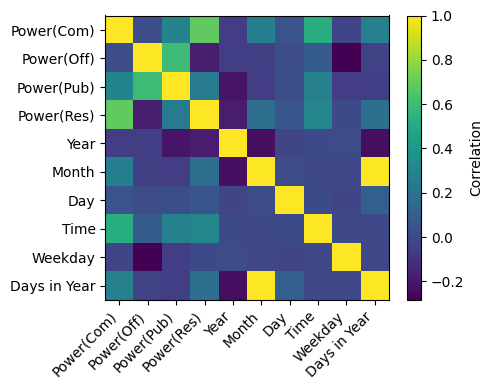

In [156]:
cols = df2.columns.tolist()

plt.figure(figsize=(5, 4))

im = plt.imshow(
    df2.reset_index(drop=True).corr().to_numpy(),
    aspect='auto',
    origin='upper'
)

plt.colorbar(im, label='Correlation')

plt.xticks(
    ticks=range(len(cols)),
    labels=cols,
    rotation=45,
    ha='right'
)

plt.yticks(
    ticks=range(len(cols)),
    labels=cols
)

# plt.xlabel('Region')
# plt.ylabel('Region')

plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, 'correlation.png'), dpi=300)
plt.show()


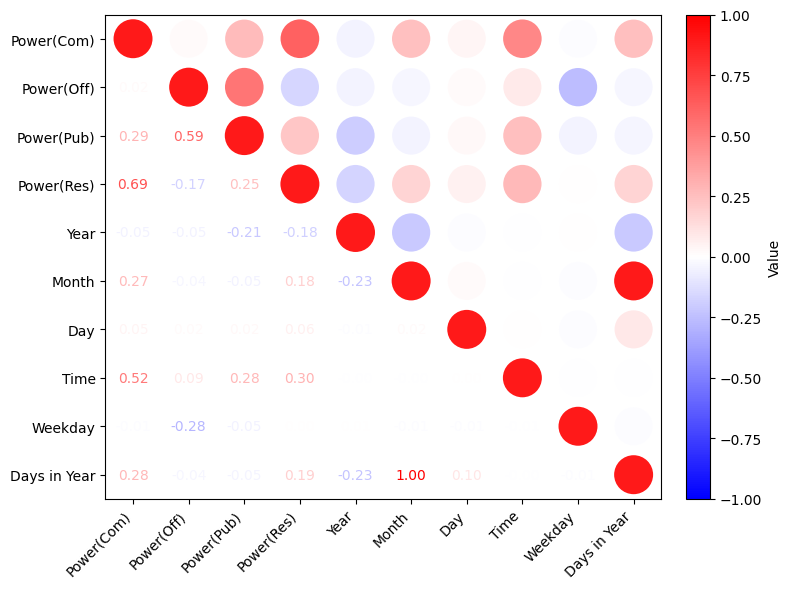

In [199]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import TwoSlopeNorm

def bubble_matrix_plot(mat, x_labels=None, y_labels=None, cmap='viridis', vmax=None, vmin=None, scale=2000):
    """
    mat: 2D numpy array (rows = y, cols = x)
    x_labels, y_labels: optional lists for tick labels
    cmap: colormap name
    vmax, vmin: optional value range for color/size normalization
    scale: multiplier to control marker areas
    """
    mat = np.asarray(mat)
    nrows, ncols = mat.shape
    x = np.arange(ncols)
    y = np.arange(nrows)
    xx, yy = np.meshgrid(x, y)

    vals = mat.ravel()
    # vmin = vals.min() if vmin is None else vmin
    # vmax = vals.max() if vmax is None else vmax
    norm = Normalize(vmin=-1, vmax=1)

    # sizes: map values to marker area (points^2). clamp to avoid zero-size.
    # scaled = (vals - vmin) / (vmax - vmin + 1e-12)
    # sizes = (scaled * scale) + (scale * 0.05)

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    sizes = sigmoid(np.abs(vals)/10)*1500

    # mask for upper-right triangle (xi >= yi)
    mask_b = (xx.ravel() >= yy.ravel()) # | True
    # mask_t = (xx.ravel() < yy.ravel())

    xx_m = xx.ravel()[mask_b]
    yy_m = yy.ravel()[mask_b]
    vals_m = vals[mask_b]
    sizes_m = sizes[mask_b]

    fig, ax = plt.subplots(figsize=(ncols * 0.6 + 2, nrows * 0.4 + 2))
    sc = ax.scatter(xx_m, yy_m, s=sizes_m, c=vals_m, cmap=cmap, norm=norm,
                    edgecolors='w', linewidths=0, alpha=0.9)

    # add text labels centered in circles
    for (xi, yi, v, sz) in zip(xx.ravel(), yy.ravel(), vals, sizes):
        if xi >= yi:
            continue  # only label lower triangle and diagonal
        fs = max(8, min(12, int(8 + (sz / scale) * 8)))  # font size scaled to marker
        # ax.text(xi, yi, f"{v:.2f}", ha='center', va='center', fontsize=fs, color='white' if norm(v) > 0.5 else 'black')
        # the text's color should follow the colormap at value v
        color = matplotlib.colormaps[cmap](norm(v))
        ax.text(xi, yi, f"{v:.2f}", ha='center', va='center', fontsize=fs, color=color)

    # ticks and labels
    ax.set_xticks(x)
    ax.set_yticks(y)
    if x_labels is not None:
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
    if y_labels is not None:
        ax.set_yticklabels(y_labels)
    ax.set_xlim(-0.5, ncols - 0.5)
    ax.set_ylim(nrows - 0.5, -0.5)  # invert y so row 0 is at top (matrix style)

    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Value')

    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, 'bubble_matrix_plot_hires.png'), dpi=600)
    plt.show()

# Example usage with a numpy matrix
mat = np.array([[0.5, 1.2, 0.3],
                [2.4, 0.8, 1.1],
                [0.2, 1.7, 2.0]])
bubble_matrix_plot(df2.reset_index(drop=True).corr().to_numpy(), cmap='bwr', scale=2500,
                   x_labels=df2.columns.tolist(), y_labels=df2.columns.tolist())

# If you have a pandas DataFrame `df`, call:
# bubble_matrix_plot(df.values, x_labels=df.columns.tolist(), y_labels=df.index.tolist())